Project overview

 Importing Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from scipy.stats.mstats import winsorize

Data Loading

In [8]:
df = pd.read_csv('./resources/prices.csv')


In [9]:
print(df.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


data cleaning

In [11]:
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [12]:
df.shape

(287, 11)

In [13]:
numerical_summary = df.describe()

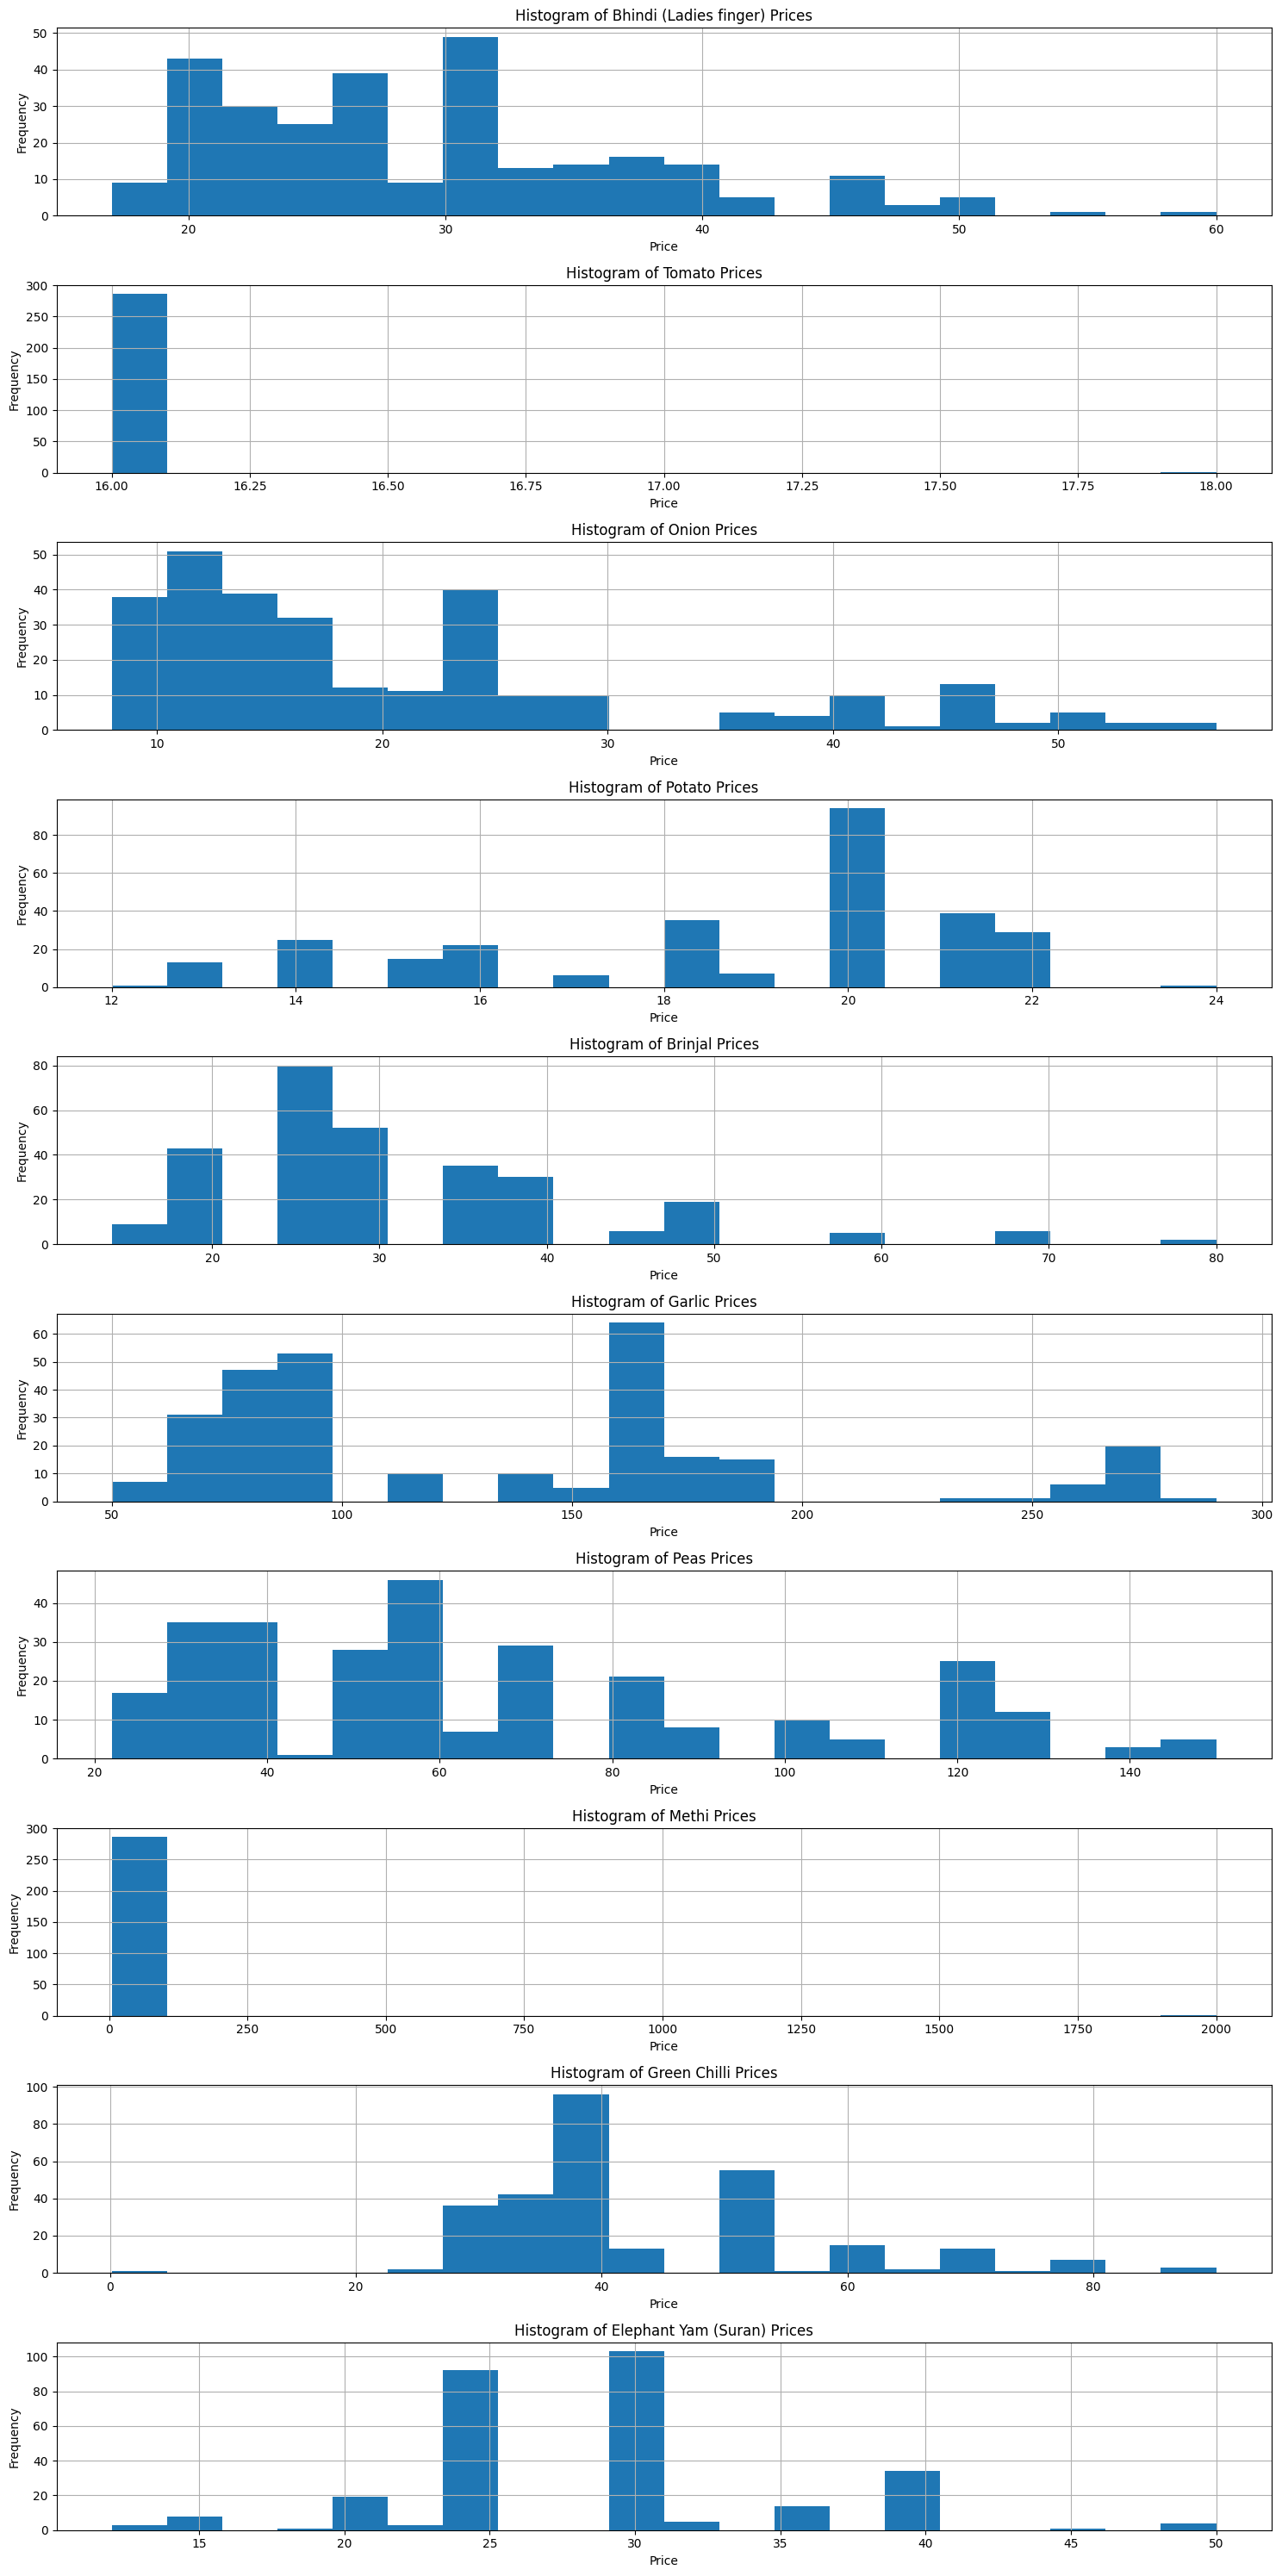

In [14]:
vegetables = df.columns[1:]

fig, axes = plt.subplots(nrows = len(vegetables), figsize = (15, 30))

for i, veg in enumerate(vegetables):
    df.hist(column = veg, bins = 20, ax = axes[i])
    axes[i].set_title(f"Histogram of {veg} Prices")
    axes[i].set_xlabel("Price")
    axes[i].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

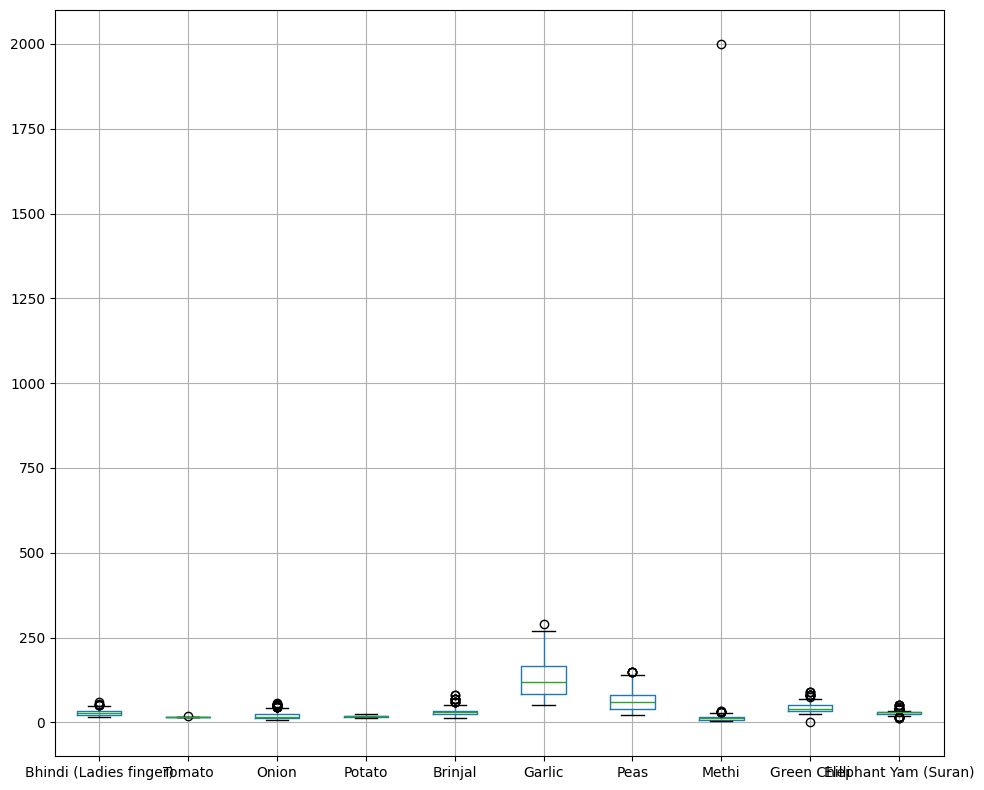

In [15]:
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [16]:
missing_values = df.isnull().sum()
print (missing_values)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


In [17]:
cleaned_df = df.dropna()

In [18]:
print(cleaned_df.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


In [19]:
print(cleaned_df.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


In [20]:
cleaned_df = df.drop_duplicates()

In [21]:
leaned_df = df.drop_duplicates(keep='first')

In [22]:
print(df.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


In [23]:
if 'categorical_column' not in df.columns:
    print("Error: 'categorical_column' not found in DataFrame.")

Error: 'categorical_column' not found in DataFrame.


In [24]:
print(df.dtypes)

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object


In [25]:
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Price Dates'], dtype='object')


In [26]:
if 'numerical_column_1' in df.columns:
    print("Column 'numerical_column_1' exists in the DataFrame.")
else:
    print("Column 'numerical_column_1' does not exist in the DataFrame.")



Column 'numerical_column_1' does not exist in the DataFrame.


In [27]:
if 'quantity' in df.columns:
    print("Column 'quantity' exists in the DataFrame.")
else:
    print("Column 'quantity' does not exist in the DataFrame.")

Column 'quantity' does not exist in the DataFrame.


exploratory data analysis (EDA) 

In [28]:
print(df.dtypes)

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object


In [29]:
if all(col in df.columns for col in ['numerical_column_1', 'numerical_column_2']):
    # Perform EDA using the specified columns
    # For example, visualize the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='numerical_column_1', y='numerical_column_2', data=df)
    plt.title('Scatter Plot of Numerical Columns')
    plt.xlabel('Numerical Column 1')
    plt.ylabel('Numerical Column 2')
    plt.show()
else:
    print("One or more specified columns do not exist in the DataFrame.")

One or more specified columns do not exist in the DataFrame.


In [30]:
condition = 10 > 5

In [31]:
if condition:
    print(True)
else:
    print(False)

True


 Conclusion and Insights